In [12]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from mpl_toolkits.basemap import Basemap

ImportError: No module named basemap

In [5]:
import sklearn

In [4]:
from sklearn.cluster import k_means

In [5]:
import json

In [7]:
import pandas as pd

In [8]:
# from Patrick's notebook
BUSINESSES = "../yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"

In [9]:
COLS_TO_READ = ['state', 'longitude', 'latitude', 'name', 'stars']

In [12]:
ff = open(BUSINESSES)
results = []
dfs = []
categories = set()
for line in ff.xreadlines():
    result = json.loads(line)
    if (result['state'] == 'QC'):# and ('Restaurants' in result['categories']):
        dfs.append(pd.DataFrame(result, columns=COLS_TO_READ, index=pd.Index([result['business_id']])))
df = pd.concat(dfs)
del dfs

# Set index name to "business_id"
df.index.name = 'business_id'

In [14]:
df.columns

Index([u'state', u'longitude', u'latitude', u'name', u'stars'], dtype='object')

In [17]:
df.head()

,state,longitude,latitude,name,stars
business_id,,,,,
lW9Up8oVTWUEut_R6nZG-g,QC,-73.544570,45.545073,Atomic Café,4.0
rWmYk-i8EF-g07KnVkdlqQ,QC,-73.542120,45.561749,Restaurant Les Princesses,2.5
RZma06CqXbOIMzTQL-eJFQ,QC,-73.635581,45.589137,La Cage Aux Sports,2.0
GxfgoiDLfs7HC8C_wFsGPw,QC,-73.574577,45.548671,Boulangerie Première Moisson,4.5
e1_MTuBa4LTN1E2RKh53Xg,QC,-73.585389,45.555818,Zytynsky's Deli,4.5


In [26]:
df.loc[:,('longitude', 'latitude')]

,longitude,latitude
business_id,,
lW9Up8oVTWUEut_R6nZG-g,-73.544570,45.545073
rWmYk-i8EF-g07KnVkdlqQ,-73.542120,45.561749
RZma06CqXbOIMzTQL-eJFQ,-73.635581,45.589137
GxfgoiDLfs7HC8C_wFsGPw,-73.574577,45.548671
e1_MTuBa4LTN1E2RKh53Xg,-73.585389,45.555818
yLj-pKIc-V530j1G6ySQ2Q,-73.552666,45.567943
IY5GFZTZCywC0ylKuG9ebA,-73.559333,45.540425
g8Ja8BKskzmWHX9VH7B2yg,-73.566166,45.551943
Env21pieyFD60kaC0xbmcg,-73.542183,45.584279


In [29]:
geoclusters = k_means(df.loc[:,('longitude', 'latitude')], 100)

In [42]:
geoclusters[0][0] # first element of the first cluster

array([-73.56578814,  45.51651935])

In [33]:
geoclusters[0][1].mean() # meaningless, avging lat and long for one elt

-14.10552595779863

In [40]:
df.describe()

,longitude,latitude,stars
count,4942.000000,4942.000000,4942.000000
mean,-73.602766,45.510923,3.710036
std,0.070349,0.031680,0.769009
min,-73.994516,45.401767,1.000000
25%,-73.612711,45.496027,3.500000
50%,-73.578865,45.510540,4.000000
75%,-73.567498,45.524995,4.500000
max,-73.450201,45.730644,5.000000


In [43]:
geoclusters[0]

array([[-73.56578814,  45.51651935],
       [-73.70282852,  45.4917766 ],
       [-73.85839222,  45.45224272],
       [-73.62463004,  45.4984731 ],
       [-73.74694567,  45.56389035],
       [-73.57773752,  45.48102045],
       [-73.60899324,  45.53189592],
       [-73.57215633,  45.59857181],
       [-73.47010657,  45.4532373 ],
       [-73.62187475,  45.47134375],
       [-73.57709422,  45.53203195],
       [-73.79841525,  45.48378011],
       [-73.54160601,  45.5488415 ],
       [-73.81791163,  45.57080687],
       [-73.62972085,  45.54323453],
       [-73.46895502,  45.47763263],
       [-73.94955603,  45.40537838],
       [-73.57391555,  45.49966055],
       [-73.680728  ,  45.51215991],
       [-73.84469154,  45.63798959],
       [-73.65600519,  45.71043099],
       [-73.65316215,  45.53395805],
       [-73.75201891,  45.45526843],
       [-73.78736334,  45.61608385],
       [-73.70567015,  45.57693084],
       [-73.68286123,  45.43322076],
       [-73.55756322,  45.50168846],
 

In [52]:
print geoclusters[0].transpose()[0].mean() # mean long for cluster
print geoclusters[0].transpose()[1].mean() # mean lat for cluster

-73.652464177
45.5211006118


In [72]:
len(geoclusters)

3

In [99]:
# cluster labels
cluster_labels = geoclusters[1]
cluster_labels

array([12, 69, 49, ..., 17, 17,  3], dtype=int32)

In [104]:
# Get the size of each cluster (ie number of members)
cluster_sizes = []
for i in range(0, 100):
    cluster_sizes.append(list(cluster_labels).count(i))

In [81]:
cluster_centers = geoclusters[0]

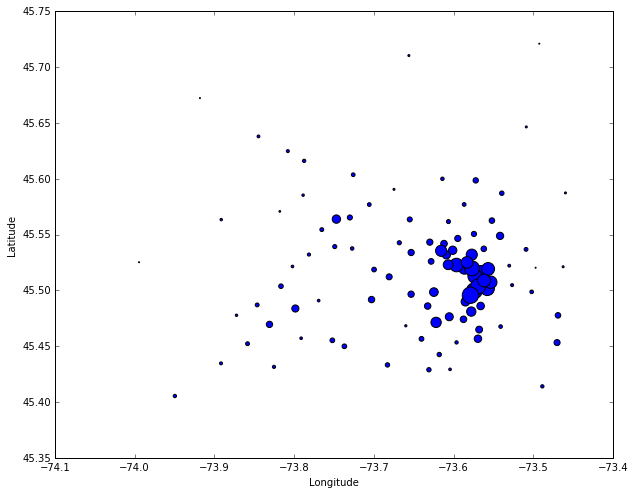

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1], s=cluster_sizes)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Redoing the clustering using KMeans class

In [34]:
from sklearn.cluster import KMeans

In [111]:
nclusters = 100

In [112]:
clf = KMeans(nclusters)

In [127]:
geoclusters = clf.fit(df.loc[:,('longitude', 'latitude')])

In [128]:
cluster_centers = geoclusters.cluster_centers_
cluster_labels = geoclusters.labels_

In [129]:
cluster_sizes = []
for i in range(0, 100):
    cluster_sizes.append(list(cluster_labels).count(i))

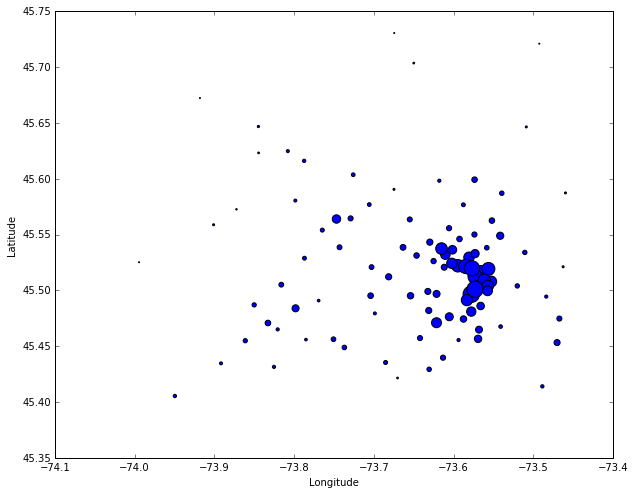

In [130]:
plt.figure(figsize=(10,8))
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1], s=cluster_sizes)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Visualize the clusters and boundaries
(similar to: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

In [143]:
# Step size of mesh
h = 0.0005

# Create a mesh to cover min to max x and y values
x_min, x_max = df['longitude'].min() - 0.1, df['longitude'].max() + 0.1
y_min, y_max = df['latitude'].min() - 0.1, df['latitude'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

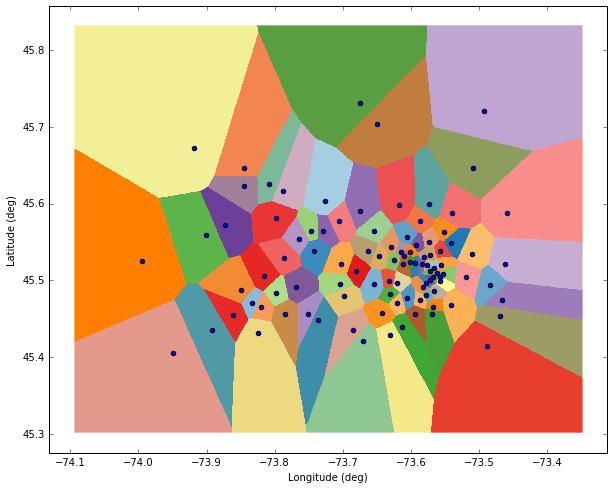

In [149]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1],
           # s=cluster_sizes # scale points by num members in a cluster
           )
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")

## Let's now do clustering only with restaurants

In [153]:
df.head()

,state,longitude,latitude,name,stars
business_id,,,,,
lW9Up8oVTWUEut_R6nZG-g,QC,-73.544570,45.545073,Atomic Café,4.0
rWmYk-i8EF-g07KnVkdlqQ,QC,-73.542120,45.561749,Restaurant Les Princesses,2.5
RZma06CqXbOIMzTQL-eJFQ,QC,-73.635581,45.589137,La Cage Aux Sports,2.0
GxfgoiDLfs7HC8C_wFsGPw,QC,-73.574577,45.548671,Boulangerie Première Moisson,4.5
e1_MTuBa4LTN1E2RKh53Xg,QC,-73.585389,45.555818,Zytynsky's Deli,4.5


In [23]:
COLS_TO_READ = ['state', 'longitude', 'latitude', 'name', 'stars', 'catstr']

In [24]:
BUSINESSES

'../yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'

In [28]:
ff = open(BUSINESSES)
results = []
dfs = []
ii = 0
for line in ff.xreadlines():
    ii += 1
    result = json.loads(line)
    result['catstr'] = "|".join(result['categories'])
    if (result['state'] == 'QC') and ('Restaurants' in result['catstr']):
        dfs.append(pd.DataFrame(result, columns=COLS_TO_READ, index=pd.Index([result['business_id']])))
df_restaurants = pd.concat(dfs)
del dfs

# Set index name to "business_id"
#df_restaurants.index.name = 'business_id'

In [31]:
df_restaurants.head()

,state,longitude,latitude,name,stars,catstr
lW9Up8oVTWUEut_R6nZG-g,QC,-73.544570,45.545073,Atomic Café,4.0,Cafes|Restaurants
rWmYk-i8EF-g07KnVkdlqQ,QC,-73.542120,45.561749,Restaurant Les Princesses,2.5,Adult Entertainment|Breakfast & Brunch|Nightli...
e1_MTuBa4LTN1E2RKh53Xg,QC,-73.585389,45.555818,Zytynsky's Deli,4.5,Delis|Sandwiches|Restaurants
yLj-pKIc-V530j1G6ySQ2Q,QC,-73.552666,45.567943,Jardin Tiki,2.5,Buffets|Chinese|Restaurants
IY5GFZTZCywC0ylKuG9ebA,QC,-73.559333,45.540425,Restaurant St-Hubert Rotisserie,3.5,Canadian (New)|Restaurants


In [32]:
len(df_restaurants)

3033

In [35]:
nclusters = 100
clf = KMeans(nclusters)

In [52]:
geoclusters = clf.fit(df_restaurants.loc[:,('longitude', 'latitude')])

In [53]:
cluster_centers = geoclusters.cluster_centers_
cluster_labels = geoclusters.labels_

In [54]:
cluster_sizes = []
for i in range(0, 100):
    cluster_sizes.append(list(cluster_labels).count(i))

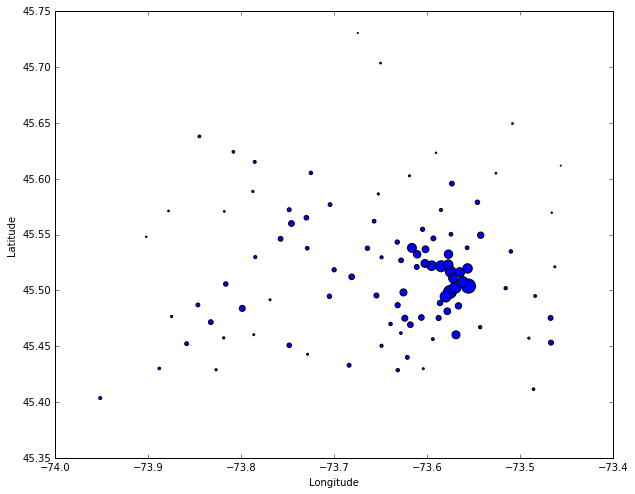

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1], s=cluster_sizes)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [56]:
# Step size of mesh
h = 0.0005

In [57]:
# Create a mesh to cover min to max x and y values
x_min, x_max = df['longitude'].min() - 0.1, df['longitude'].max() + 0.1
y_min, y_max = df['latitude'].min() - 0.1, df['latitude'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [58]:
# Obtain labels for each point in mesh. Use last trained model.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

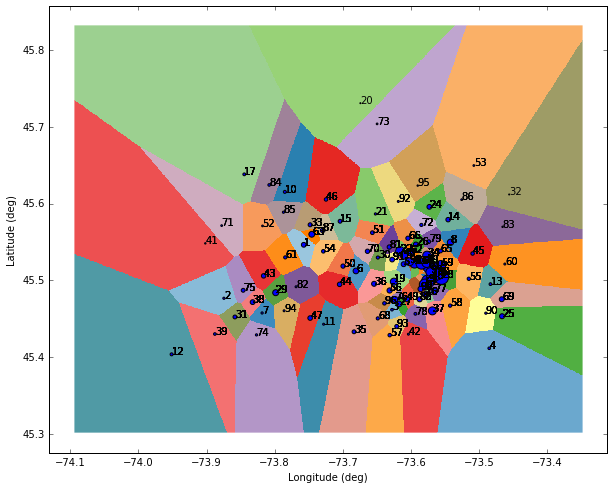

In [65]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1],
            s=cluster_sizes # scale points by num members in a cluster
           )
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")

# Plot cluster labels (numbers) at centroid positions
for cluster in cluster_labels:
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], cluster)

In [48]:
import collections

In [72]:
# Count over Z as a proxy for cluster area (ie the area of the polygon on graph)
cluster_areas = collections.Counter(Z.flatten())
cluster_areas

Counter({0: 366,
         1: 4365,
         2: 14467,
         3: 1248,
         4: 90725,
         5: 1409,
         6: 3380,
         7: 3433,
         8: 3924,
         9: 490,
         10: 13754,
         11: 24882,
         12: 149262,
         13: 4400,
         14: 5012,
         15: 7238,
         16: 767,
         17: 198939,
         18: 465,
         19: 2486,
         20: 105592,
         21: 10671,
         22: 932,
         23: 1084,
         24: 4978,
         25: 31196,
         26: 1187,
         27: 962,
         28: 2207,
         29: 3580,
         30: 2360,
         31: 4872,
         32: 75256,
         33: 3954,
         34: 1078,
         35: 35190,
         36: 4615,
         37: 6362,
         38: 2766,
         39: 27416,
         40: 453,
         41: 126545,
         42: 31349,
         43: 7417,
         44: 8358,
         45: 7521,
         46: 21000,
         47: 10050,
         48: 423,
         49: 1719,
         50: 4078,
         51: 4128,
         5

In [47]:
Z

array([[13, 13, 13, ..., 43, 43, 43],
       [13, 13, 13, ..., 43, 43, 43],
       [13, 13, 13, ..., 43, 43, 43],
       ..., 
       [70, 70, 70, ..., 73, 73, 73],
       [70, 70, 70, ..., 73, 73, 73],
       [70, 70, 70, ..., 73, 73, 73]], dtype=int32)

Compute some summary properties for each cluster:
- average star rating
- area (done; Z)
- number of members (done; cluster_sizes)
- density of businesses (number members/area)

In [76]:
cluster_densities = []
for cluster in cluster_areas:
    density = float(cluster_sizes[cluster])/float(cluster_areas.values()[cluster])
    cluster_densities.append(density)

In [79]:
cluster_densities

[0.3087431693989071,
 0.005269186712485682,
 0.00034561415635584434,
 0.005608974358974359,
 7.715624138881235e-05,
 0.017033356990773598,
 0.009467455621301775,
 0.0014564520827264782,
 0.010193679918450561,
 0.33877551020408164,
 0.0006543550966991421,
 0.0001607587814484366,
 6.029665956506009e-05,
 0.0018181818181818182,
 0.0039904229848363925,
 0.002072395689416966,
 0.05867014341590613,
 4.0213331724800064e-05,
 0.1913978494623656,
 0.02011263073209976,
 9.470414425335253e-06,
 0.00046855964764314496,
 0.08583690987124463,
 0.08487084870848709,
 0.004620329449578144,
 0.0008013847929221695,
 0.020219039595619208,
 0.034303534303534305,
 0.09016764839148166,
 0.01005586592178771,
 0.00423728813559322,
 0.003078817733990148,
 1.3287977038375677e-05,
 0.004046535154274153,
 0.06586270871985157,
 0.00042625745950554135,
 0.005417118093174431,
 0.010059729644765796,
 0.008315256688358641,
 0.00025532535745550046,
 0.12141280353200883,
 1.5804654470741632e-05,
 0.00012759577657979522,


In [86]:
df_restaurants["ClustNum"] = geoclusters.labels_

groups = df_restaurants.groupby(by="ClustNum")

cluster_ratings = groups.stars.mean()

cluster_ratings

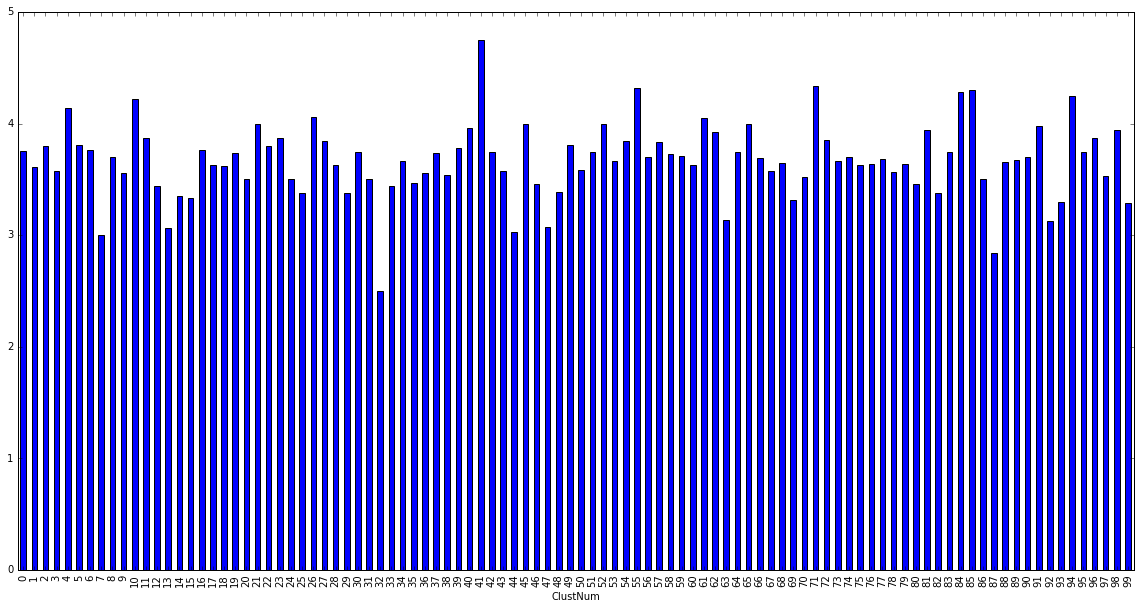

In [118]:
# Plot average star ratings per cluster
plt.figure(figsize=(20,10))
cluster_ratings.plot(kind='bar')

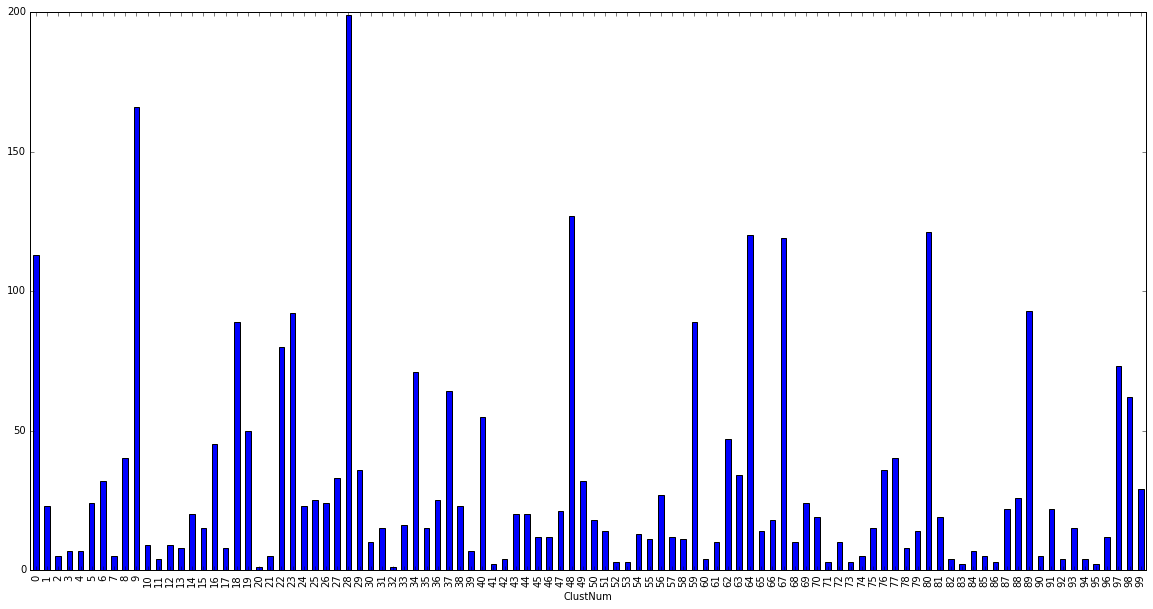

In [111]:
# Plot number of members per cluster
groups.stars.count().plot(kind='bar', figsize=(20,10))

In [123]:
#cluster_ratings_list = []
#for rating in cluster_ratings:
#    cluster_ratings_list.append(rating)

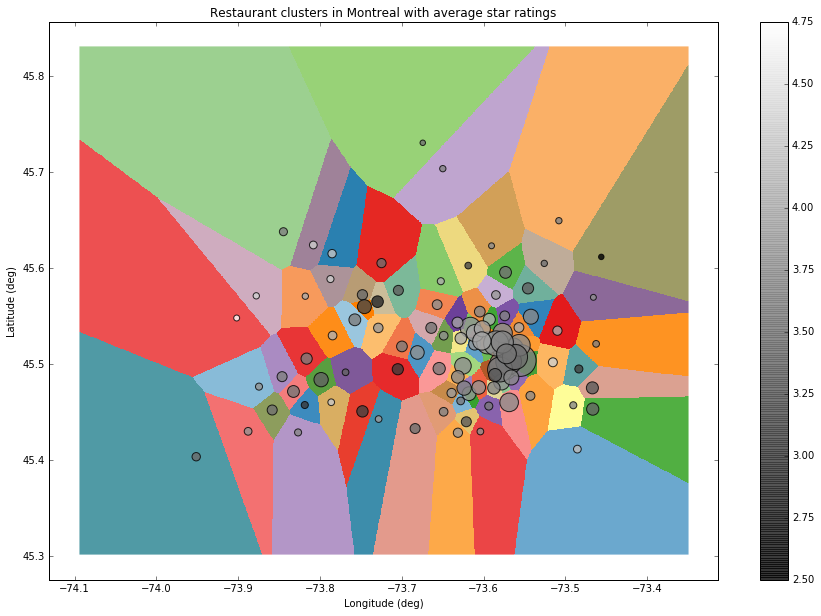

In [152]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1],
            s=(np.array(cluster_sizes)+5)*5, # scale points by num members in a cluster
            c=cluster_ratings, cmap='gray', 
            #edgecolor='none',
            alpha=0.8
           )
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.colorbar()
plt.title("Restaurant clusters in Montreal with average star ratings")

# Plot cluster labels (numbers) at centroid positions
#for cluster in cluster_labels:
#    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], cluster)

Create a df for cluster info

In [166]:
clusters = pd.DataFrame(columns=['Area', 'Number members', 'Density', 'AvgRating'])

In [177]:
clusters['Density'] = cluster_densities
clusters['AvgRating'] = cluster_ratings
clusters['Area'] = cluster_areas.values()
clusters['Number members'] = cluster_sizes

In [181]:
clusters.index.name = 'ClustNum'

In [182]:
clusters

,Area,Number members,Density,AvgRating
ClustNum,,,,
0,366,113,0.308743,3.756637
1,4365,23,0.005269,3.608696
2,14467,5,0.000346,3.800000
3,1248,7,0.005609,3.571429
4,90725,7,0.000077,4.142857
5,1409,24,0.017033,3.812500
6,3380,32,0.009467,3.765625
7,3433,5,0.001456,3.000000
8,3924,40,0.010194,3.700000


In [185]:
restoclust = df_restaurants.join(clusters, on='ClustNum')

In [186]:
restoclust.head()

,state,longitude,latitude,name,stars,catstr,ClustNum,Area,Number members,Density,AvgRating
lW9Up8oVTWUEut_R6nZG-g,QC,-73.544570,45.545073,Atomic Café,4.0,Cafes|Restaurants,8,3924,40,0.010194,3.7000
rWmYk-i8EF-g07KnVkdlqQ,QC,-73.542120,45.561749,Restaurant Les Princesses,2.5,Adult Entertainment|Breakfast & Brunch|Nightli...,8,3924,40,0.010194,3.7000
e1_MTuBa4LTN1E2RKh53Xg,QC,-73.585389,45.555818,Zytynsky's Deli,4.5,Delis|Sandwiches|Restaurants,26,1187,24,0.020219,4.0625
yLj-pKIc-V530j1G6ySQ2Q,QC,-73.552666,45.567943,Jardin Tiki,2.5,Buffets|Chinese|Restaurants,14,5012,20,0.003990,3.3500
IY5GFZTZCywC0ylKuG9ebA,QC,-73.559333,45.540425,Restaurant St-Hubert Rotisserie,3.5,Canadian (New)|Restaurants,65,1711,14,0.008182,4.0000


In [ ]:
# For each restaurant, how does its rating compare to its avg cluster rating?
#restoclust['RatingVsAvg'] = 

In [187]:
restoclust.index.name = 'business_id'

In [195]:
restoclust.to_csv("RestaurantsWithClusters.csv", encoding='utf-8')

Save all cafes in the data to a cafe df
- define cafe as anything which does *not* list "Restaurants" in categories, and lists "Cafe" or "Coffee & Tea"

In [196]:
ff = open(BUSINESSES)
results = []
dfs = []
ii = 0
for line in ff.xreadlines():
    ii += 1
    result = json.loads(line)
    result['catstr'] = "|".join(result['categories'])
    if (result['state'] == 'QC') and ('Restaurants' not in result['catstr']) and \
    ('Cafe' in result['catstr'] or 'Coffee & Tea' in result['catstr']):
        dfs.append(pd.DataFrame(result, columns=COLS_TO_READ, index=pd.Index([result['business_id']])))
df_cafes = pd.concat(dfs)
del dfs

# Set index name to "business_id"
df_cafes.index.name = 'business_id'

In [197]:
df_cafes.head()

,state,longitude,latitude,name,stars,catstr
business_id,,,,,,
Xw0QclTW5f4c3REYhmcNvQ,QC,-73.601379,45.538188,Olives et Café Noir,4.0,Food|Specialty Food|Grocery|Coffee & Tea
HSaH-ndgYCoBLzomTEoGKw,QC,-73.565135,45.515683,Starbucks,4.0,Food|Coffee & Tea
lMK4SaIA9XNc4RP1OPF-MA,QC,-73.575069,45.525219,Cafe Rico,4.0,Food|Coffee & Tea
BDYnpS1f_gJb1geqJ6LqKg,QC,-73.580643,45.526473,Second Cup,3.5,Food|Coffee & Tea
kLHeO77WiU_P1hEA95dkzQ,QC,-73.566195,45.507460,Second Cup,3.0,Food|Coffee & Tea


In [198]:
len(df_cafes)

168

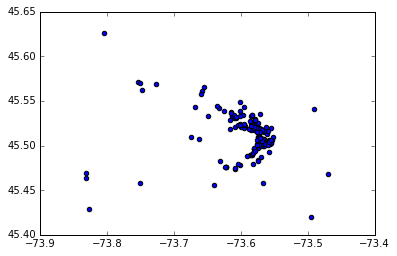

In [200]:
plt.scatter(df_cafes['longitude'], df_cafes['latitude'])

Save all non-cafes and non-restaurants to a df of "other"

In [201]:
ff = open(BUSINESSES)
results = []
dfs = []
ii = 0
for line in ff.xreadlines():
    ii += 1
    result = json.loads(line)
    result['catstr'] = "|".join(result['categories'])
    if (result['state'] == 'QC') and ('Restaurants' not in result['catstr']) and \
    ('Cafe' not in result['catstr']) and ('Coffee & Tea' not in result['catstr']):
        dfs.append(pd.DataFrame(result, columns=COLS_TO_READ, index=pd.Index([result['business_id']])))
df_other = pd.concat(dfs)
del dfs

# Set index name to "business_id"
df_other.index.name = 'business_id'

In [202]:
df_other.head()

,state,longitude,latitude,name,stars,catstr
business_id,,,,,,
RZma06CqXbOIMzTQL-eJFQ,QC,-73.635581,45.589137,La Cage Aux Sports,2.0,Pubs|Bars|Sports Bars|Nightlife
GxfgoiDLfs7HC8C_wFsGPw,QC,-73.574577,45.548671,Boulangerie Première Moisson,4.5,Bakeries|Food
g8Ja8BKskzmWHX9VH7B2yg,QC,-73.566166,45.551943,Rose ou Bleu,3.0,Children's Clothing|Fashion|Shopping|Baby Gear...
RySnetMQUJKbbtliTt4Nmw,QC,-73.549722,45.559632,Biodôme de Montréal,3.5,Museums|Active Life|Arts & Entertainment|Botan...
dvXKsHW_WIdRbbE_Jsxx3A,QC,-73.548181,45.561379,Cineplex- Starcité,3.5,Arts & Entertainment|Cinema


In [203]:
len(df_other)

1741

## Let's cluster cafes
- use a smaller number of clusters here, as we have only 168 cafes in data

In [208]:
# aside: save this so don't overwrite
df_allbusinesses = df

In [254]:
df = df_cafes

In [255]:
df.head()

,state,longitude,latitude,name,stars,catstr,ClustNum
business_id,,,,,,,
Xw0QclTW5f4c3REYhmcNvQ,QC,-73.601379,45.538188,Olives et Café Noir,4.0,Food|Specialty Food|Grocery|Coffee & Tea,3
HSaH-ndgYCoBLzomTEoGKw,QC,-73.565135,45.515683,Starbucks,4.0,Food|Coffee & Tea,0
lMK4SaIA9XNc4RP1OPF-MA,QC,-73.575069,45.525219,Cafe Rico,4.0,Food|Coffee & Tea,0
BDYnpS1f_gJb1geqJ6LqKg,QC,-73.580643,45.526473,Second Cup,3.5,Food|Coffee & Tea,0
kLHeO77WiU_P1hEA95dkzQ,QC,-73.566195,45.507460,Second Cup,3.0,Food|Coffee & Tea,9


In [256]:
nclusters = 20
clf = KMeans(nclusters)

geoclusters = clf.fit(df.loc[:,('longitude', 'latitude')])

cluster_centers = geoclusters.cluster_centers_
cluster_labels = geoclusters.labels_

cluster_sizes = []
for i in range(0, nclusters):
    cluster_sizes.append(list(cluster_labels).count(i))

# Count over Z as a proxy for cluster area (ie the area of the polygon on graph)
cluster_areas = collections.Counter(Z.flatten())

cluster_densities = []
for cluster in cluster_areas:
    density = float(cluster_sizes[cluster])/float(cluster_areas.values()[cluster])
    cluster_densities.append(density)

df["ClustNum"] = geoclusters.labels_
groups = df.groupby(by="ClustNum")
cluster_ratings = groups.stars.mean()
cluster_ratings

ClustNum
0     3.437500
1     4.000000
2     4.000000
3     4.250000
4     4.500000
5     4.500000
6     3.676471
7     4.150000
8     4.100000
9     4.250000
10    5.000000
11    4.023810
12    2.500000
13    4.000000
14    4.047619
15    3.758065
16    4.300000
17    3.500000
18    4.500000
19    4.125000
Name: stars, dtype: float64

In [257]:
# Step size of mesh
h = 0.0005

# Create a mesh to cover min to max x and y values
x_min, x_max = df['longitude'].min() - 0.1, df['longitude'].max() + 0.1
y_min, y_max = df['latitude'].min() - 0.1, df['latitude'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

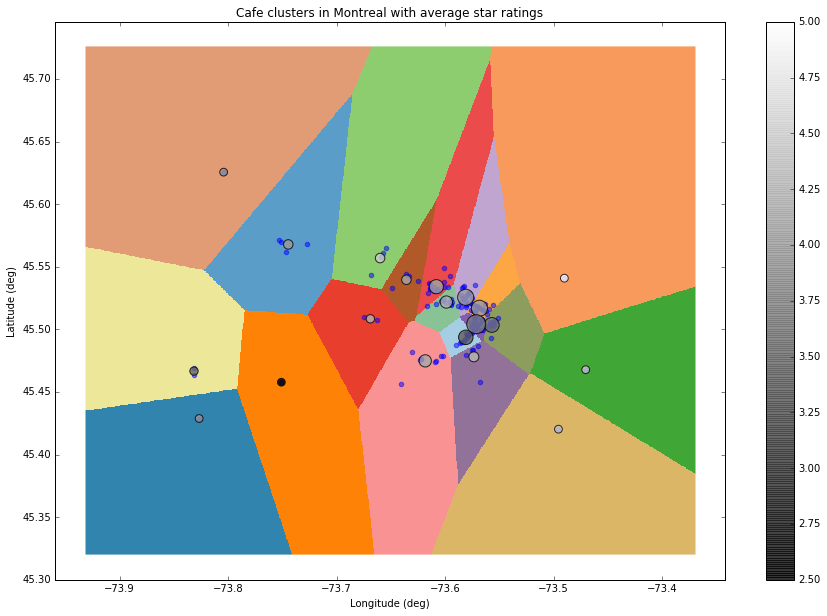

In [259]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1],
            s=(np.array(cluster_sizes)+5)*10, # scale points by num members in a cluster
            c=cluster_ratings, cmap='gray', 
            #edgecolor='none',
            alpha=0.8,
            zorder=2
           )
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.colorbar()
plt.title("Cafe clusters in Montreal with average star ratings") # **CAFE clusters, oops

# Plot cluster labels (numbers) at centroid positions
#for cluster in cluster_labels:
#    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], cluster)

# Add all cafes as points
plt.scatter(df['longitude'], df['latitude'], zorder=1, color='blue', alpha=0.5)

In [260]:
clusters_cafes = pd.DataFrame(columns=['Area', 'Number members', 'Density', 'AvgRating'])

clusters_cafes['Density'] = cluster_densities
clusters_cafes['AvgRating'] = cluster_ratings
clusters_cafes['Area'] = cluster_areas.values()
clusters_cafes['Number members'] = cluster_sizes

clusters_cafes.index.name = 'ClustNum'

cafeclust = df.join(clusters_cafes, on='ClustNum')

In [261]:
cafeclust

,state,longitude,latitude,name,stars,catstr,ClustNum,Area,Number members,Density,AvgRating
business_id,,,,,,,,,,,
Xw0QclTW5f4c3REYhmcNvQ,QC,-73.601379,45.538188,Olives et Café Noir,4.0,Food|Specialty Food|Grocery|Coffee & Tea,8,66012,15,0.000227,4.100000
HSaH-ndgYCoBLzomTEoGKw,QC,-73.565135,45.515683,Starbucks,4.0,Food|Coffee & Tea,11,71383,21,0.000294,4.023810
lMK4SaIA9XNc4RP1OPF-MA,QC,-73.575069,45.525219,Cafe Rico,4.0,Food|Coffee & Tea,14,150668,21,0.000139,4.047619
BDYnpS1f_gJb1geqJ6LqKg,QC,-73.580643,45.526473,Second Cup,3.5,Food|Coffee & Tea,14,150668,21,0.000139,4.047619
kLHeO77WiU_P1hEA95dkzQ,QC,-73.566195,45.507460,Second Cup,3.0,Food|Coffee & Tea,15,82342,31,0.000376,3.758065
ZyqsXaby0GSqliXglIPHCQ,QC,-73.615120,45.537364,Brulerie Aux Quatre Vents,3.5,Food|Coffee & Tea,8,66012,15,0.000227,4.100000
7tRWa7ivUi6_PqaPD4MQpQ,QC,-73.580827,45.517624,Cafe Pi,3.5,Food|Coffee & Tea,14,150668,21,0.000139,4.047619
MgCds-bkgu4KJi73agCtrQ,QC,-73.561980,45.514606,Second Cup,3.5,Food|Coffee & Tea,11,71383,21,0.000294,4.023810
r4b_3rm5SrldX-Lz8AycpA,QC,-73.555652,45.519503,Starbucks,4.5,Food|Coffee & Tea,11,71383,21,0.000294,4.023810


In [262]:
cafeclust.to_csv("CafesWithClusters2.csv", encoding='utf-8')

## Let's cluster everything else ('other')

In [273]:
df = df_other
len(df)

1741

In [274]:
nclusters = 100
clf = KMeans(nclusters)

geoclusters = clf.fit(df.loc[:,('longitude', 'latitude')])

cluster_centers = geoclusters.cluster_centers_
cluster_labels = geoclusters.labels_

cluster_sizes = []
for i in range(0, nclusters):
    cluster_sizes.append(list(cluster_labels).count(i))

# Count over Z as a proxy for cluster area (ie the area of the polygon on graph)
cluster_areas = collections.Counter(Z.flatten())

cluster_densities = []
for cluster in cluster_areas:
    density = float(cluster_sizes[cluster])/float(cluster_areas.values()[cluster])
    cluster_densities.append(density)

df["ClustNum"] = geoclusters.labels_
groups = df.groupby(by="ClustNum")
cluster_ratings = groups.stars.mean()

In [275]:
# Step size of mesh
h = 0.0005

# Create a mesh to cover min to max x and y values
x_min, x_max = df['longitude'].min() - 0.1, df['longitude'].max() + 0.1
y_min, y_max = df['latitude'].min() - 0.1, df['latitude'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

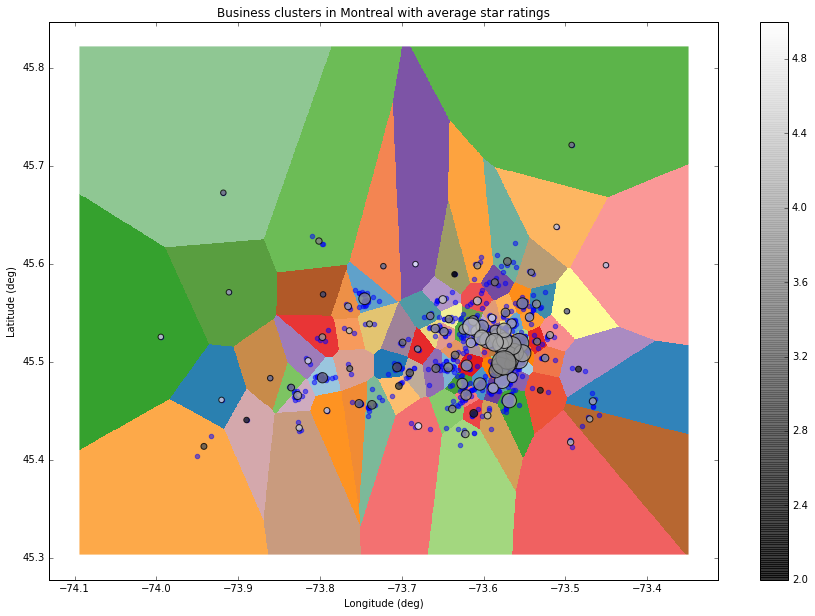

In [276]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(cluster_centers.transpose()[0], cluster_centers.transpose()[1],
            s=(np.array(cluster_sizes)+5)*5, # scale points by num members in a cluster
            c=cluster_ratings, cmap='gray', 
            #edgecolor='none',
            alpha=0.8,
            zorder=2
           )
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.colorbar()
plt.title("Business clusters in Montreal with average star ratings")

# Plot cluster labels (numbers) at centroid positions
#for cluster in cluster_labels:
#    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], cluster)

# Add all businesses as points
plt.scatter(df['longitude'], df['latitude'], zorder=1, color='blue', alpha=0.5)

In [277]:
clusters_other = pd.DataFrame(columns=['Area', 'Number members', 'Density', 'AvgRating'])

clusters_other['Density'] = cluster_densities
clusters_other['AvgRating'] = cluster_ratings
clusters_other['Area'] = cluster_areas.values()
clusters_other['Number members'] = cluster_sizes

clusters_other.index.name = 'ClustNum'

otherclust = df.join(clusters_other, on='ClustNum')